# Assignment 23
Statistics for understanding the market



In this assignment, your goal is to find the stocks that is well suited for your investment. The list below is the step-by-step to choose the stock.

1. Use Python to donwload the historical prices from Jaunary 1, 2020 to December 21, 2020 from Yahoo Finance. Here, we are interested in the top 48 stocks in the market. All symbols of all 48 stocks are given in the "set48.txt" attached with the assignment in Google Classroom. 


In [3]:
# Put your code for the item 1 here
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as reader
set48_file = "/content/drive/MyDrive/set48.txt"
data_frames = dict()
stocks = []
with open(set48_file) as csv_file:
   csv_reader = csv.reader(csv_file, delimiter=',')
   for row in csv_reader:     
     data_frames[row[0]] = reader.DataReader(f"{row[0]}.BK", "yahoo","2020-01-01","2020-12-21") 
     stocks.append(row[0])



2. Next, you want to find the top **five** stocks with the highest average return. Please add the average annualized return (RET) of the top five stock by computing the average daily return and multiply with 250 (Here, we assume that there are 250 trading days in a year.). You must put your results by filling the blank below:
The stocks are


  1.  ______________________ with ________________ % of return
  2.   ______________________ with ________________ % of return
  3.   ______________________ with ________________ % of return
  4.   ______________________ with ________________ % of return
  5.   ______________________ with ________________ % of return


In [28]:
# put your code for finding the top five stocks with the highest average return here.
ret = []
for stock in stocks:
  ret.append(data_frames[stock]['Adj Close'].pct_change(1).dropna().mean()*250)
df = pd.DataFrame(ret, index=stocks, columns=["Daily Return"])
idx = np.argsort(df["Daily Return"].values)[::-1]
print(df.iloc[idx[:5]])

        Daily Return
KTC         0.510674
CBG         0.473796
GLOBAL      0.250856
IVL         0.233689
SAWAD       0.207978


3. You also concern about the risk. As a result, you want stock with the lowest volatility. Here. the volatilities are measured by the standard deviations (STDs), Report stocks with the five lowest volatilities and compute their corresponding annualized STD by multiply the daily STD with the square root of 250.(√250  )  
The stocks are 
  1.   ______ with ____ % of volatility
  2.   ______ with ____ % of volatility
  3.   ______ with ____ % of volatility
  4.   ______ with ____ % of volatility
  5.   ______ with ____ % of volatility

In [27]:
# put your code for finding the top five stocks with the lowest average volatilities here.
# put your code for finding the top five stocks with the highest average return here.
ret = []
for stock in stocks:
  ret.append(data_frames[stock]['Adj Close'].pct_change(1).dropna().std()*np.sqrt(250))
df = pd.DataFrame(ret, index=stocks, columns=["Daily STD"])
idx = np.argsort(df["Daily STD"].values)
print(df.iloc[idx[:5]])

        Daily STD
CPALL    0.262414
TTW      0.263115
ADVANC   0.269114
INTUCH   0.299354
SCC      0.355591


4. Furthermore, the volatility and return should be compared. A stock with the same level of return the one with lower volatility is more preferable. Thus, in this part, you will compute the coefficient of variation (CV) defined as (STD/RET). Here, a stock with lower CV is less volatile. However, we should look only the stock with positive return. Hence, find the op 5 stocks with the **lowest CV** and the **positive return**:

The stocks are
  1.   ______ with CV of ____ 
  2.   ______ with CV of ____ 
  3.   ______ with CV of ____ 
  4.   ______ with CV of ____ 
  5.   ______ with CV of ____ 



In [32]:
# put your code for finding the top five stocks with the lowest CVs here.
ret = []
for stock in stocks:
  retk = data_frames[stock]['Adj Close'].pct_change(1).dropna().mean()*250
  stdk = data_frames[stock]['Adj Close'].pct_change(1).dropna().std()*np.sqrt(250)
  ret.append(stdk/retk)
df = pd.DataFrame(ret, index=stocks, columns=["CV"])
df_positive = df[df.CV > 0]
idx = np.argsort(df_positive["CV"].values)
print(df_positive.iloc[idx[:5]])

              CV
KTC     1.026461
CBG     1.137994
GLOBAL  2.097906
IVL     2.692603
SAWAD   3.029335


5. From the stock in Part 4. Use the stock with lowest CV and plot histogram of the annualized return.


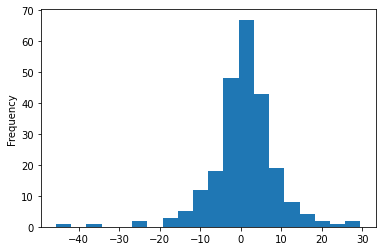

In [41]:
# put your code for plot histogram and histogram here.
df_ktc = data_frames['KTC']
ret = df_ktc["Adj Close"].pct_change(1).dropna() *250
ret.plot.hist(bins=20)

6. The investment is risky. To control the risk, a good investor will diversify their portfolio with securities that have negative correlations. Find the two stocks with lowest (more negative) correlations 
Stock 1_________ Stock 2__________ with correlation of ___________________.

In [57]:
# put your code fo finding stocks with lowest correlation here.
ret = dict()
for stock in stocks:
  ret[stock] = data_frames[stock]['Adj Close'].pct_change(1).dropna()
df_ret = pd.DataFrame(ret)
corr =df_ret.corr() 
cor_mat = corr.values
rw,cl = np.nonzero(cor_mat == cor_mat.min())
print(rw[0], cl[0])
print("Stock with lowest Correlatoin coefficient: ", df_ret.columns[rw[0]], df_ret.columns[cl[0]])
print(f"   with rho  = {cor_mat[rw[0], cl[0]]}")


19 29
Stock with lowest Correlatoin coefficient:  GULF MTC
   with rho  = 0.05636011404601099


7.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 1 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _______________________

In [69]:
# put you code for 7 here.
wealth = 1000000
stock = "GULF"
stock_at_day_1 = wealth / data_frames[stock]['Adj Close'].values[0]
wealth_last_day = stock_at_day_1 * data_frames[stock]['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on {stock}: {wealth_last_day:,.2f}")

Total Wealth on the last day by investing 1,000,000 on GULF: 201,484.56


8.From two stocks in Part 6. If an intestor invest 1 million THB on Stock 2 alone on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _______________________

In [70]:
# put you code for 8 here.
wealth = 1000000
stock = "MTC"
stock_at_day_1 = wealth / data_frames[stock]['Adj Close'].values[0]
wealth_last_day = stock_at_day_1 * data_frames[stock]['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on {stock}: {wealth_last_day:,.2f}")

Total Wealth on the last day by investing 1,000,000 on MTC: 894,658.37


9.From two stocks in Part 6. If an intestor invest 0.5 million THB on Stock 1 and 0.5 million THB on Stock 2 on January 1, 2020. How much money an investor has at the end of December 21, 2020? Answer _________________

In [71]:
# put you code for 7 here.
wealth = 500000
stock1 = "GULF"
stock_at_day_1 = wealth / data_frames[stock1]['Adj Close'].values[0]
wealth_last_day_1 = stock_at_day_1 * data_frames[stock1]['Adj Close'].values[-1]


wealth = 500000
stock2 = "MTC"
stock_at_day_1 = wealth / data_frames[stock2]['Adj Close'].values[0]
wealth_last_day_2 = stock_at_day_1 * data_frames[stock2]['Adj Close'].values[-1]
print(f"Total Wealth on the last day by investing {wealth:,} on {stock1} and {stock2} each: {wealth_last_day_1 + wealth_last_day_2:,.2f}")

Total Wealth on the last day by investing 500,000 on GULF and MTC each: 548,071.47
